Accuracy: 0.671875
|--- feature_4 <= 130.50
|   |--- feature_2 <= 26.35
|   |   |--- feature_2 <= 9.10
|   |   |   |--- class: 0
|   |   |--- feature_2 >  9.10
|   |   |   |--- class: 0
|   |--- feature_2 >  26.35
|   |   |--- feature_3 <= 28.50
|   |   |   |--- class: 0
|   |   |--- feature_3 >  28.50
|   |   |   |--- class: 0
|--- feature_4 >  130.50
|   |--- feature_2 <= 29.95
|   |   |--- feature_4 <= 144.50
|   |   |   |--- class: 0
|   |   |--- feature_4 >  144.50
|   |   |   |--- class: 1
|   |--- feature_2 >  29.95
|   |   |--- feature_4 <= 157.50
|   |   |   |--- class: 1
|   |   |--- feature_4 >  157.50
|   |   |   |--- class: 1



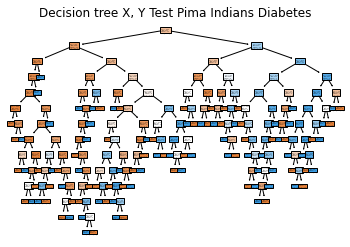

In [18]:
#Import Library 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn import tree

#Melakukan pembacaaan dataset 
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("/content/sample_data/pima-indians-diabetes.csv", header=None, names=col_names)
#print(pima) 

#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
x = pima[feature_cols] # Features
y = pima.label # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=3)

    # Membuat objek DT
     # Dapat dioptimalkan dengan menghitung Entropy  
clf = DecisionTreeClassifier()
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Melakukan Pelatihan DT 
clf = clf.fit(X_train,y_train)

# Memprediksi 
y_pred = clf.predict(X_test)

# Menghitung akurasi model 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Exporting DT Text visualization
text_representation = tree.export_text(clf)
print(text_representation)

# Tree Visualization
plt.figure()
clf = DecisionTreeClassifier().fit(X_test, y_test)
plot_tree(clf, filled=True)
plt.title("Decision tree X, Y Test Pima Indians Diabetes")
plt.show()

In [ ]:
# Load Dataset
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  

from sklearn.datasets import load_boston
boston_dataset = load_boston()

boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

boston['MEDV'] = boston_dataset.target
names = boston_dataset.feature_names
#Library CART pada python
from sklearn.tree import DecisionTreeRegressor 

array = boston.values

X = array[:,0:13]
Y = array[:,13]
#print(X)
#print(Y)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)

#model = DecisionTreeRegressor(max_leaf_nodes = 20)

model = DecisionTreeRegressor(criterion='squared_error', max_depth=None, max_features=None,
          max_leaf_nodes=50, min_impurity_decrease=0.0,
          min_samples_leaf=1,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          random_state=None, splitter='best')

#Evaluasi 
rt = model.fit(X_train, Y_train)
rt

import random as rnd

rnd.seed(123458)
X_new = X[rnd.randrange(X.shape[0])]
X_new = X_new.reshape(1,13)

#Prediksi Model 
YHat = model.predict(X_new)


df = pd.DataFrame(X_new, columns = names)
df["Predicted Price"] = YHat
df.head(1)

from sklearn.metrics import r2_score
YHat = model.predict(X_test)
print(YHat)

#Menghitung Rata-rata Kuadrat
r2 = r2_score(Y_test, YHat)
print("R-Squared = ", r2)


[35.51       24.26666667 10.38571429 22.35238095 14.02142857 23.71666667
 19.83421053 15.43571429 20.575      27.45       15.43571429 22.35238095
 22.35238095 18.31666667 17.71111111 23.71666667  8.49285714 16.81428571
 19.83421053 10.38571429 37.73333333 23.71666667 19.83421053 16.81428571
 27.45       19.77142857 19.83421053 22.46428571 31.52857143 22.83333333
 20.575      19.33333333 18.31666667 14.02142857 23.71666667 17.13333333
 20.50714286 22.35238095 10.38571429  8.49285714  8.49285714 18.31666667
 49.78571429 31.76       19.83421053 25.4375     25.4375     42.3
 14.02142857 25.4375     19.83421053 35.51       23.71666667 23.71666667
 50.         31.76       10.38571429 31.52857143 25.4375     22.35238095
 35.51       15.43571429 29.33333333 37.73333333 10.38571429 22.46428571
 35.51       20.50714286 47.36666667 47.36666667 10.95       23.71666667
 14.02142857 19.18333333 23.71666667 10.38571429 47.36666667 23.71666667
 15.08181818 15.08181818 47.36666667 49.78571429 23.716666

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
#Impor Library 
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

#Load cancer dataset
bc = datasets.load_breast_cancer()
X = bc.data
y = bc.target

#membagi dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)

#Melakukan pipelining 
#pipeline = make_pipeline(StandardScaler(),
  #                      LogisticRegression(random_state=1))

#Skema bagging
#bgclassifier = BaggingClassifier(base_estimator=pipeline, n_estimators=100,
 #                           max_features=8,
  #                         max_samples=80,
   #                            random_state=1, n_jobs=5)

#bgclassifier.fit(X_train, y_train)

print('Model test Score: %.3f, ' %bgclassifier.score(X_test, y_test),
      'Model training Score: %.3f' %bgclassifier.score(X_train, y_train))




Model test Score: 0.958,  Model training Score: 0.960


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df[data.feature_names], df['target'], random_state=0)

In [ ]:
# Step 1: Import the model you want to use
# This was already imported earlier in the notebook so commenting out
#from sklearn.tree import DecisionTreeClassifier
# Step 2: Make an instance of the Model
clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)
# Step 3: Train the model on the data
clf.fit(X_train, Y_train)
# Step 4: Predict labels of unseen (test) data
# Not doing this step in the tutorial
# clf.predict(X_test)

DecisionTreeClassifier(max_depth=2, random_state=0)

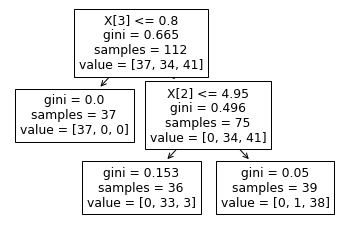

In [ ]:
tree.plot_tree(clf);

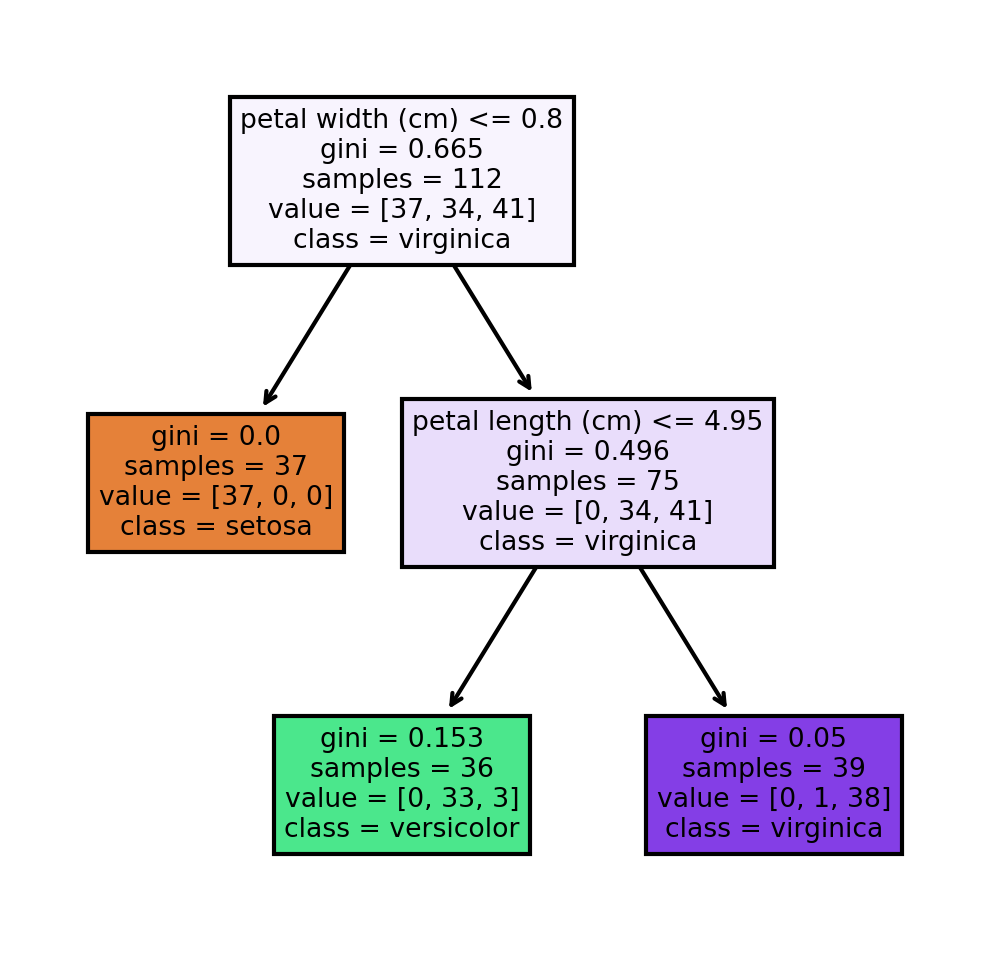

In [ ]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

In [ ]:
tree.export_graphviz(clf,
                     out_file="tree.dot",
                     feature_names = fn, 
                     class_names=cn,
                     filled = True)